Ensure that you have the dataset file named `transactions.csv` in the `Data` directory.

The dataset is a subset of https://www.kaggle.com/ealaxi/paysim1/version/2 which was originally generated as part of the following research:

E. A. Lopez-Rojas , A. Elmir, and S. Axelsson. "PaySim: A financial mobile money simulator for fraud detection". In: The 28th European Modeling and Simulation Symposium-EMSS, Larnaca, Cyprus. 2016

Step 2. Now, we will complete the following exercises.

0. Read the dataset (`transactions.csv`) as a Pandas dataframe. Note that the first row of the CSV contains the column names.

0. Return the column names as a list from the dataframe.

0. Return the first k rows from the dataframe.

0. Return a random sample of k rows from the dataframe.

0. Return a list of the unique transaction types.

0. Return a Pandas series of the top 10 transaction destinations with frequencies.

0. Return all the rows from the dataframe for which fraud was detected.

0. Bonus. Return a dataframe that contains the number of distinct destinations that each source has interacted with to, sorted in descending order. You will find [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) and [agg](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.aggregate.html) useful. The predefined aggregate functions are under `pandas.core.groupby.GroupBy.*`. See the [left hand column](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.DataFrameGroupBy.nunique.html).

**Create graphs for the following.** 
1. Transaction types bar chart, Transaction types split by fraud bar chart
1. Origin account balance delta v. Destination account balance delta scatter plot for Cash Out transactions

Ensure that the graphs have the following:
 - Title
 - Labeled Axes
 
The function plot the graph and then return a string containing a short description explaining the relevance of the chart.

**All Exercises**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def exercise_0(file):
    df = pd.read_csv(file)
    print(df.head())
    return df

def exercise_1(df):
    column_names = df.columns.tolist()
    return column_names

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    sample_k_rows = df.sample(n=k)
    return sample_k_rows

def exercise_4(df):
    unique_transaction_types = df['type'].unique().tolist()
    return unique_transaction_types

def exercise_5(df):
    top_destinations = df['nameDest'].value_counts().head(10)
    return top_destinations

def exercise_6(df):
    fraud_rows = df[df['isFraud'] == 1]
    return fraud_rows

def exercise_7(df):
    interaction_counts = df.groupby('nameOrig')['nameDest'].nunique()
    interaction_counts = interaction_counts.sort_values(ascending=False)
    interaction_counts = interaction_counts.reset_index()
    interaction_counts.columns = ['Source', 'Distinct_Destinations']
    return interaction_counts

def visual_1(df):
    transaction_counts = df['type'].value_counts()
    fig, ax = plt.subplots()
    sns.barplot(x=transaction_counts.index, y=transaction_counts.values, ax=ax)
    ax.set_title('Transaction Types')
    ax.set_xlabel('Type')
    ax.set_ylabel('Frequency')
    plt.show()

def visual_2(df):
    transaction_counts = df.groupby('type')['isFraud'].value_counts().unstack()
    fig, ax = plt.subplots()
    transaction_counts.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title('Transaction Types Split by Fraud')
    ax.set_xlabel('Type')
    ax.set_ylabel('Frequency')
    plt.show()

In [45]:
df = exercise_0('../Data/transactions.csv')

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig   
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36  \
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


Below are the column names:
['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

First 10 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig   
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36  \
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00

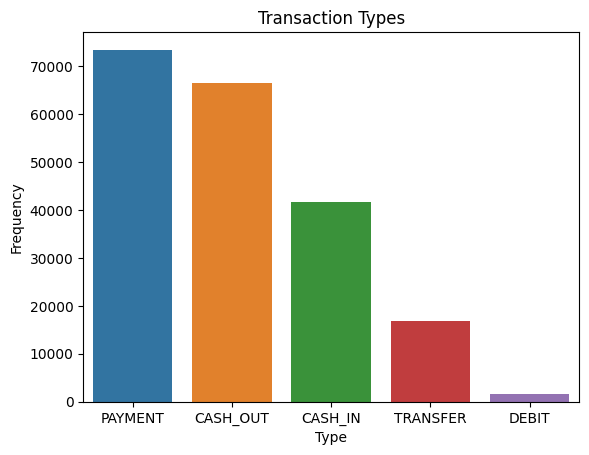

None


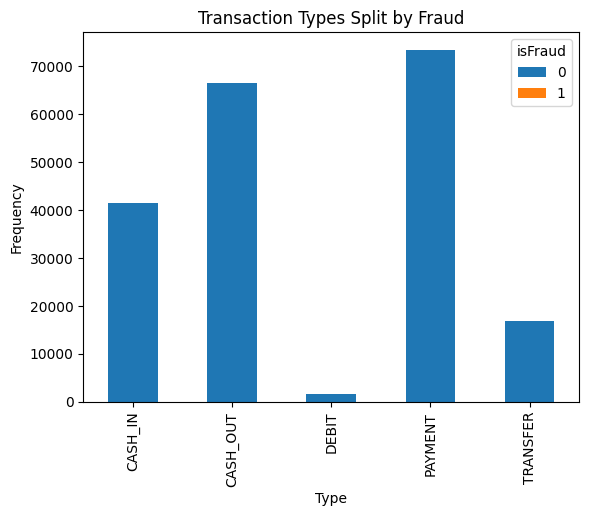

None


In [47]:
# Test exercises here
#Testing Exercise 1
column_names = exercise_1(df)
print("Below are the column names:")
print(column_names)

#Testing Exercise 2
first_k_rows = exercise_2(df,10)
print("\nFirst 10 rows:")
print(first_k_rows)

#Testing Exercise 3
sample_k_rows = exercise_3(df,10)
print("\nRandom sample of 10 rows:")
print(sample_k_rows)

#Testing Exercise 4
unique_transaction = exercise_4(df)
print("\nA list of unique transaction types:")
print(unique_transaction)

#Testing Exercise 5
top_ten = exercise_5(df)
print("\nTop 10 transaction destinations with frequencies")
print(top_ten)

#Testing Exercise 6
fraud = exercise_6(df)
print("\nAll the rows where fraud was detected")
print(fraud)

#Testing Exercise 7 - Bonus
interactions = exercise_7(df)
print("\nDataframe that contains the number of distinct destinations that each source has interacted with, sorted in descending order")
print(interactions)

#Testing visual 1
visual = visual_1(df)
print(visual)

#Testing visual 2
visual_two = visual_2(df)
print(visual_two)




Use your newly-gained Pandas skills to find an insight from the dataset. You have full flexibility to go in whichever direction interests you. Please create a visual as above for this query. `visual_custom` should call `exercise_custom`.

In [56]:
def exercise_custom(df):
    avg_transaction_amount = df.groupby('type')['amount'].mean()
    return avg_transaction_amount
    
def visual_custom(avg_transaction_amount):
    fig, ax = plt.subplots()
    avg_transaction_amount.plot(kind='bar', ax=ax)
    ax.set_title('Average Amount of Transactions by Type')
    ax.set_xlabel('Type')
    ax.set_ylabel('Average Amount')
    plt.show()
    
def plot_balance_delta_scatter(df):
    """
    Plot a scatter plot of origin account balance delta vs. destination account balance delta for Cash Out transactions.
    """

    df_cash_out = df[df['type'] == 'CASH_OUT'].copy()
    df_cash_out['originBalanceDelta'] = df_cash_out['newbalanceOrig'] - df_cash_out['oldbalanceOrg']
    df_cash_out['destinationBalanceDelta'] = df_cash_out['newbalanceDest'] - df_cash_out['oldbalanceDest']

    fig, ax = plt.subplots()

    ax.scatter(df_cash_out['originBalanceDelta'], df_cash_out['destinationBalanceDelta'], alpha=0.5)

    ax.set_title('Origin vs. Destination Balance Delta for Cash Out Transactions')
    ax.set_xlabel('Origin Balance Delta')
    ax.set_ylabel('Destination Balance Delta')

    plt.show()

    return "This scatter plot shows the change in balance for the origin account versus the destination account for Cash Out transactions. This can help us understand the relationship between these two quantities, which may be useful for detecting patterns or anomalies."


Mean of the transaction type
type
CASH_IN     181127.098924
CASH_OUT    202707.250339
DEBIT         9067.533012
PAYMENT      12044.891884
TRANSFER    846637.381022
Name: amount, dtype: float64


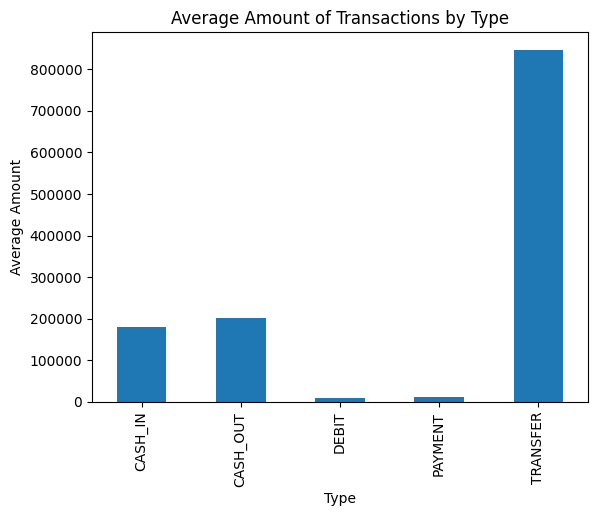

None


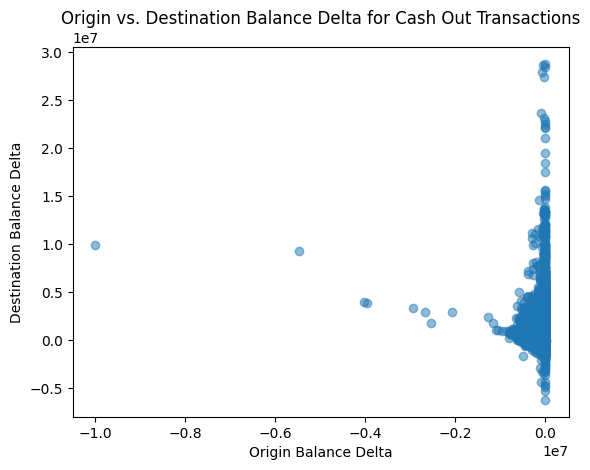

This scatter plot shows the change in balance for the origin account versus the destination account for Cash Out transactions. This can help us understand the relationship between these two quantities, which may be useful for detecting patterns or anomalies.


In [57]:
#Testing Custom Exercise
print("\nMean of the transaction type")
avg_transaction_amount = exercise_custom(df)
print(avg_transaction_amount)

#Testing Visual Custom
print(visual_custom(avg_transaction_amount))

print(plot_balance_delta_scatter(df))

Submission

1. Copy the exercises into `task1.py`.
2. Upload `task1.py` to Forage.

All done!

Your work will be instrumental for our team's continued success.